<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.327667,59.887697,94.016128,-0.010152,244.221340,244.225969,-0.004629
1,0.0,1.0,31.725617,43.515248,25.484545,0.005760,110.731171,110.722796,0.008375
2,0.0,2.0,34.649614,80.411027,51.538988,0.005858,176.605487,176.601676,0.003811
3,0.0,3.0,99.436448,56.183740,82.942183,-0.009072,248.553300,248.555495,-0.002195
4,0.0,4.0,26.069442,73.229052,42.420673,0.006375,151.725542,151.720946,0.004597
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.823362,59.417592,86.395078,0.007241,222.643273,222.631615,0.011658
59996,999.0,56.0,34.143818,49.076489,57.339928,0.004095,150.564329,150.554327,0.010003
59997,999.0,57.0,94.858874,81.345593,47.705304,-0.002170,233.907601,233.913655,-0.006054
59998,999.0,58.0,68.876229,85.297923,36.311731,-0.001609,200.484274,200.490636,-0.006362


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.327667,59.887697,94.016128,-0.010152,244.221340,244.225969,-0.004629
1,0.0,1.0,31.725617,43.515248,25.484545,0.005760,110.731171,110.722796,0.008375
2,0.0,2.0,34.649614,80.411027,51.538988,0.005858,176.605487,176.601676,0.003811
3,0.0,3.0,99.436448,56.183740,82.942183,-0.009072,248.553300,248.555495,-0.002195
4,0.0,4.0,26.069442,73.229052,42.420673,0.006375,151.725542,151.720946,0.004597
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.823362,59.417592,86.395078,0.007241,222.643273,222.631615,0.011658
59996,999.0,56.0,34.143818,49.076489,57.339928,0.004095,150.564329,150.554327,0.010003
59997,999.0,57.0,94.858874,81.345593,47.705304,-0.002170,233.907601,233.913655,-0.006054
59998,999.0,58.0,68.876229,85.297923,36.311731,-0.001609,200.484274,200.490636,-0.006362


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.327667  59.887697  94.016128  ...  244.221340  244.225969 -0.004629
      1.0    31.725617  43.515248  25.484545  ...  110.731171  110.722796  0.008375
      2.0    34.649614  80.411027  51.538988  ...  176.605487  176.601676  0.003811
      3.0    99.436448  56.183740  82.942183  ...  248.553300  248.555495 -0.002195
      4.0    26.069442  73.229052  42.420673  ...  151.725542  151.720946  0.004597
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.823362  59.417592  86.395078  ...  222.643273  222.631615  0.011658
      56.0   34.143818  49.076489  57.339928  ...  150.564329  150.554327  0.010003
      57.0   94.858874  81.345593  47.705304  ...  233.907601  233.913655 -0.006054
      58.0   68.876229  85.297923  36.311731  ...  200.484274  200.490636 -0.006362
      59.0   57.030910  26.270343  50.123513  ...  143.394643  143.414748 -0.020104

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.327667  59.887697  94.016128  ...  244.221340  244.225969 -0.004629
      1.0    31.725617  43.515248  25.484545  ...  110.731171  110.722796  0.008375
      2.0    34.649614  80.411027  51.538988  ...  176.605487  176.601676  0.003811
      3.0    99.436448  56.183740  82.942183  ...  248.553300  248.555495 -0.002195
      4.0    26.069442  73.229052  42.420673  ...  151.725542  151.720946  0.004597
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.823362  59.417592  86.395078  ...  222.643273  222.631615  0.011658
      56.0   34.143818  49.076489  57.339928  ...  150.564329  150.554327  0.010003
      57.0   94.858874  81.345593  47.705304  ...  233.907601  233.913655 -0.006054
      58.0   68.876229  85.297923  36.311731  ...  200.484274  200.490636 -0.006362
      59.0   57.030910  26.270343  50.123513  ...  143.394643  143.414748 -0.020104

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.327667,59.887697,94.016128,-0.010152,244.221340,244.225969,-0.004629
1,0.0,1.0,31.725617,43.515248,25.484545,0.005760,110.731171,110.722796,0.008375
2,0.0,2.0,34.649614,80.411027,51.538988,0.005858,176.605487,176.601676,0.003811
3,0.0,3.0,99.436448,56.183740,82.942183,-0.009072,248.553300,248.555495,-0.002195
4,0.0,4.0,26.069442,73.229052,42.420673,0.006375,151.725542,151.720946,0.004597
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.823362,59.417592,86.395078,0.007241,222.643273,222.631615,0.011658
59996,999.0,56.0,34.143818,49.076489,57.339928,0.004095,150.564329,150.554327,0.010003
59997,999.0,57.0,94.858874,81.345593,47.705304,-0.002170,233.907601,233.913655,-0.006054
59998,999.0,58.0,68.876229,85.297923,36.311731,-0.001609,200.484274,200.490636,-0.006362


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.327667  59.887697  94.016128  ...  244.221340  244.225969 -0.004629
      1.0    31.725617  43.515248  25.484545  ...  110.731171  110.722796  0.008375
      2.0    34.649614  80.411027  51.538988  ...  176.605487  176.601676  0.003811
      3.0    99.436448  56.183740  82.942183  ...  248.553300  248.555495 -0.002195
      4.0    26.069442  73.229052  42.420673  ...  151.725542  151.720946  0.004597
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.823362  59.417592  86.395078  ...  222.643273  222.631615  0.011658
      56.0   34.143818  49.076489  57.339928  ...  150.564329  150.554327  0.010003
      57.0   94.858874  81.345593  47.705304  ...  233.907601  233.913655 -0.006054
      58.0   68.876229  85.297923  36.311731  ...  200.484274  200.490636 -0.006362
      59.0   57.030910  26.270343  50.123513  ...  143.394643  143.414748 -0.020104

[60000 rows x 7 columns]

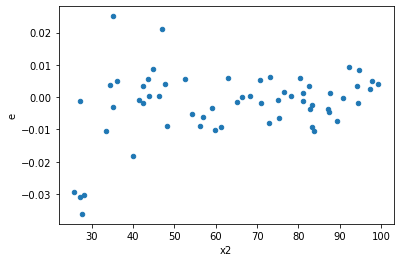

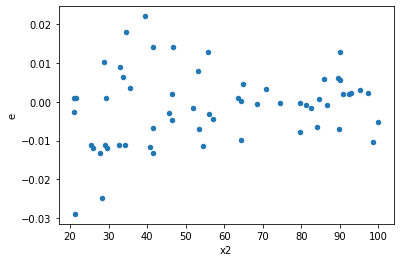

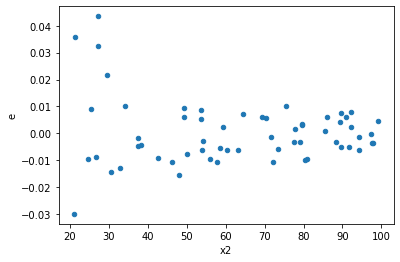

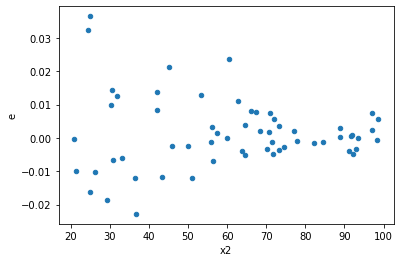

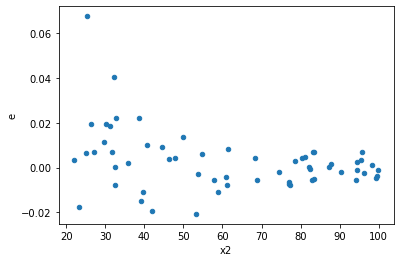

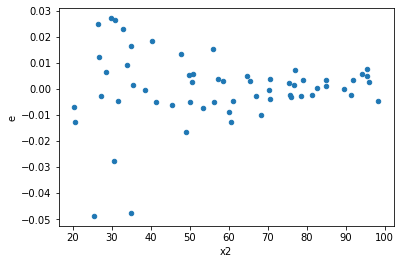

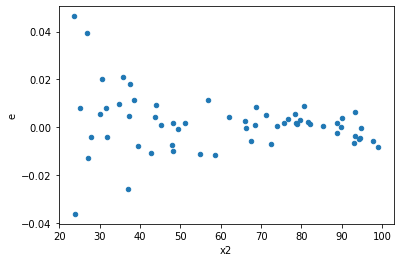

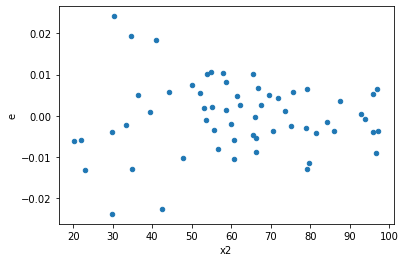

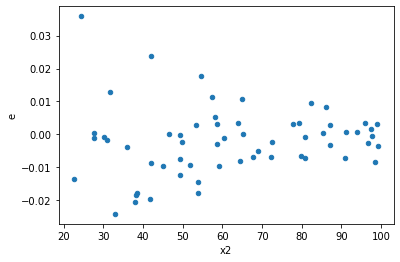

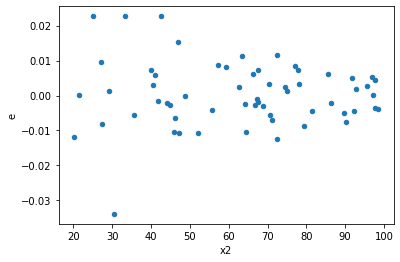

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.0036660735750270465,0.0004754468939792557,0.00017457493214414506,2.2640328284726463e-05,0.1296883120998869,1.7050986493091663e-05,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.0033468413579743907,0.0007045207703030795,0.0001593733979987805,3.354860810967045e-05,0.21050318642216037,0.0007448886239401737,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,0.005618871087412314,0.0006719618092009039,0.0002675652898767768,3.199818139051923e-05,0.11959018079383732,8.63403555112201e-06,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,0.005008759821282357,0.00029835308900175785,0.000238512372442017,1.420728995246466e-05,0.05956625984221632,1.636615022472322e-08,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.00700023447329426,0.0004390822558130548,0.0003333444987282981,2.0908678848240706e-05,0.06272393553218024,2.6595995539221168e-08,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.00784459009970282,0.00033964215740453897,0.00037355190950965803,1.6173436066882808e-05,0.04329635495134485,7.719538302267516e-10,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.006848489848233777,0.0002783048209896057,0.0003261185642016084,1.3252610523314558e-05,0.04063739994611811,4.1664297272079423e-10,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.0028712842590969544,0.0006322679084662565,0.00013672782186175973,3.0107995641250308e-05,0.22020387095533014,0.0010282712301040995,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,0.003942580015441849,0.000502952076313286,0.0001877419054972309,2.3950098872061237e-05,0.1275692755361668,1.486341752784898e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    971
Reject001=1 : Homoscedasticity       29
Name: Result_test, dtype: int64